In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from datetime import datetime

# THE CONTENT:
    i. Introduction
    ii. Ad-hoc questions
    iii. Analysis & Method
    iv. Summary
    v. Solution

# i. Introduction

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data. 
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
(Source: https://www.kaggle.com/imakash3011/rental-bike-sharing)


In [2]:
rental_bike = pd.read_csv('C://Users//nickh//OneDrive - Northeastern University//Notebooks//Intergrated//hour.csv')
rental_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# ii. Ad-hoc questions

1/ Do the passengers rent more bikes or less than in daytime? 

2/ Should the rental bike projects be effective solution for traffic?

3/ How many bikes should we prepare for the rental bike program in next years? 

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
# START !!!!!!!!!!!

# iii. Analysis & Method

1/ Assuming the daytime hours from 12 A.M - 17 P.M and nighttime hours from 6 P.M - 11 P.M, and daytime hours is the ideal time to go out because the weather would be better. I will see whether the passengers would rent more bikes or less than in the daytime. Using bootstrap replicate to resample the distribution and see its confidence interval.

In [3]:
#define the function for boostrap_replicate
def bootstrap_replicate(data, func_to_cal):
    """ Generate bootstrap replicate"""
    bootstrap_sample = np.random.choice(data, len(data))
    return func_to_cal(bootstrap_sample)
bootstrap_replicates = []
for i in range(1000):
    bs_rep = bootstrap_replicate(rental_bike[rental_bike.hr >=18 ]['cnt'], np.mean)
    bootstrap_replicates.append(bs_rep)
bootstrap_replicates1 = []
for i in range(1000):
    bs_rep = bootstrap_replicate(rental_bike[rental_bike.hr <18 ]['cnt'], np.mean)
    bootstrap_replicates1.append(bs_rep)

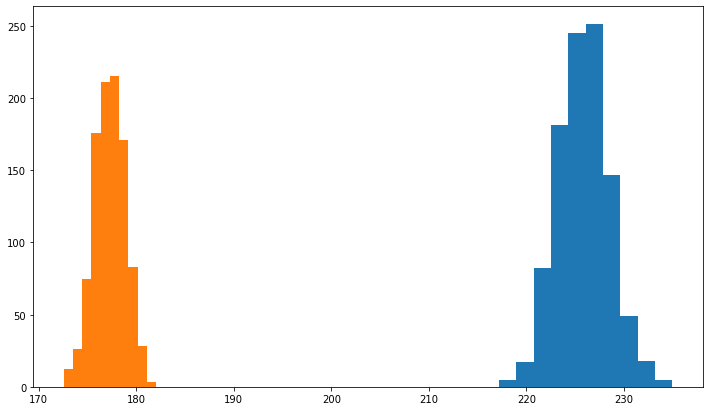

In [4]:
#Plotting a histogram of rental bikes distribution in day and night hours
plt.figure (figsize= (12,7)) 
_ = plt.hist(bootstrap_replicates)
_ = plt.hist(bootstrap_replicates1)
plt.show()


In [5]:
#Calculate the mean and size of two sample
mean_dayhr = rental_bike[rental_bike.hr <18]['cnt'].mean()
n_dayhr = rental_bike[rental_bike.hr <18]['cnt'].size
mean_nighthr = rental_bike[rental_bike.hr >=18]['cnt'].mean()
n_nighthr = rental_bike[rental_bike.hr >= 18]['cnt'].size
print("Mean and sample size of rental bikes at day hours",round(mean_dayhr,3),"&",n_dayhr,'. CI 95%',np.percentile(bootstrap_replicates1,[2.5,97.5])
)
print("Mean and sample size of rental bikes at night hours",round(mean_nighthr,3),"&",n_nighthr,'. CI 95%',np.percentile(bootstrap_replicates,[2.5,97.5])
)


Mean and sample size of rental bikes at day hours 177.278 & 13011 . CI 95% [174.15812966 180.19405887]
Mean and sample size of rental bikes at night hours 225.758 & 4368 . CI 95% [220.96584249 231.22442766]


The mean at day hours is smaller and its sample size is larger, this assumes that the large size of rental bikes at day hours might cause the smaller mean population because the daytime includes the time from 0-6 A.M when there are rarely bikers outside. Thus, we should conduct the hypothesis testing for the difference of user number in two different time by calculating its p value. At first, The variance population will help us to determine if there is unequal variance in two populations.

In [6]:
#find variance for each group
print(np.var(rental_bike[rental_bike.hr <18]['cnt']) / np.var(rental_bike[rental_bike.hr >=18]['cnt']))

1.0767160071640156


The ratio between two variance sample is less than 4:1, so we can assume the population has the equal variance. ttest_ind is used to calculate the t value for the mean of two independent sample.

The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 < µ2 (the population mean of daytime is smaller the nighttime)

In [7]:
#perform two sample t-test with equal variances
t_test = stats.ttest_ind(a=rental_bike[rental_bike.hr <18]['cnt'], b=rental_bike[rental_bike.hr >= 18]['cnt'], equal_var=True,alternative="less")
t_test

Ttest_indResult(statistic=-15.387121619012152, pvalue=2.2357750293671507e-53)

Because the p-value of our test (2.2) is larger than alpha = 0.05. There is not enough sufficient evidence to support the claim that people rent bikes in night time more frequently. Thus, the distribution of rental bikers in daytime and nighttime has no difference.

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

2/ As rental bike is the friendly-environment project, reducing the CO2 and the traffic jams. We will conduct whether the citizens have the habit to use bike during working days. If the claim is associated with the result, the project can be the solution for limiting the auto vehicles. To proceed this method, the days of week will be investigated to see if rental bikes are used equally regardless the working days or weekend days with Chi-squared test. Then after, we will gain more insight into hours at each day to see if bikers use it during rush hours or not (6-10 & 15-18).

weekday
Sun    444027
Mon    455503
Tue    469109
Wed    473048
Thu    485395
Fri    487790
Sat    477807
Name: cnt, dtype: int64


<AxesSubplot:xlabel='weekday'>

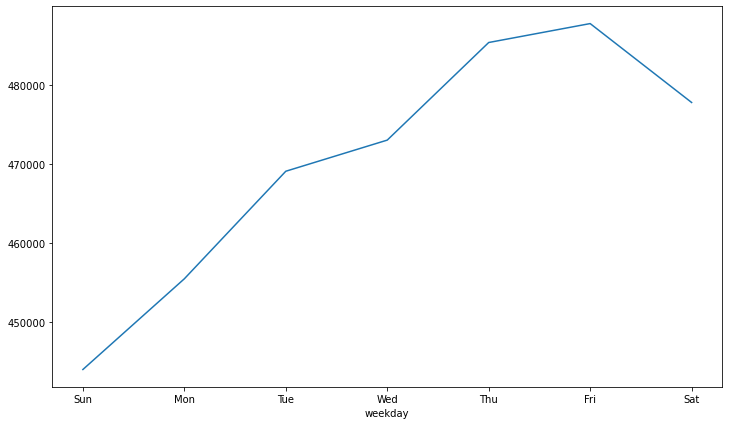

In [8]:
#Summarize the number of rental bikes in daily
plt.figure (figsize= (12,7)) 
rental_bike_total_day =rental_bike.groupby(['weekday'])['cnt'].sum()
rental_bike_total_day.rename(index={0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'},inplace=True)
print(rental_bike_total_day)
rental_bike_total_day.plot()

The plot shows people will use bikes more in weekdays, so I want to see the possibility if I assume the rental bikes are used more frequently during weekdays, when bikers would use for moving to work place. So assuming given 80% quantity of bikers rented during weekdays and 20% quantity during weekends, I will apply Chi-squared Goodness of fit test for this hypothesis. 

The two hypotheses for this particular two sample t-test are as follows:

H0: 16% quantity of rental bikes each day from Monday to Friday, 20% for Saturday and Sunday

H1:The distribution is not the same as stated in the null hypothesis.

In [9]:
rental_bike_total = rental_bike_total_day.sum()
rental_bike_total
S = rental_bike_total * 0.1
M = rental_bike_total * 0.16
T = rental_bike_total * 0.16
W = rental_bike_total * 0.16
Thu = rental_bike_total * 0.16
F = rental_bike_total * 0.16
Sat = rental_bike_total * 0.1
expected_values=[S,M,T,W,Thu,F,Sat]
print(expected_values)

[329267.9, 526828.64, 526828.64, 526828.64, 526828.64, 526828.64, 329267.9]


In [10]:
observed_values = rental_bike.groupby(['weekday'])['cnt'].sum().values
print(observed_values)

[444027 455503 469109 473048 485395 487790 477807]


In [11]:
stats.chisquare(observed_values, expected_values)

Power_divergenceResult(statistic=134627.54674316867, pvalue=0.0)

Since the p-value (0) is less than 0.05, we will not reject the null hypothesis. This means we have sufficient evidence to say that at least 80% of rental bikes are used during weekdays. 

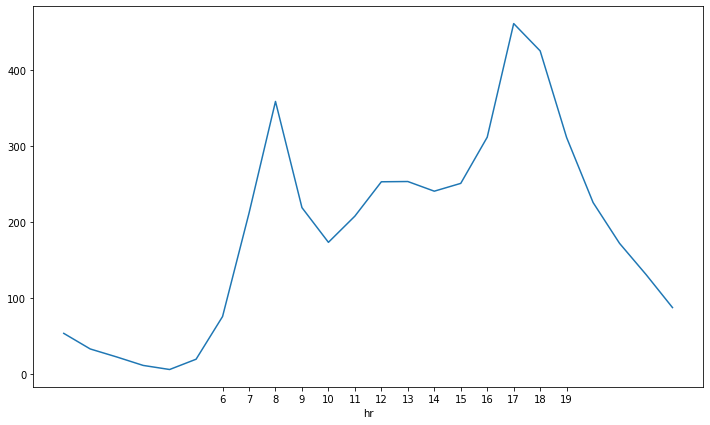

In [12]:
plt.figure (figsize= (12,7)) 
rental_bike_weekday = rental_bike[(rental_bike['weekday'] != 0) | (rental_bike['weekday'] !=6)]
mean_rental_bike_weekday = rental_bike_weekday.groupby(['hr'])['cnt'].mean()
_ = mean_rental_bike_weekday.plot()
_ = plt.xticks(range(6,20))

The busiest hours of rental bikes are around 7 and 8 in the morning, and around 17 in the evening. This just proves that rental bikes are used to move from home to work commonly. The scatter plot below will show more about when rental bikes are used during 24 hours in different days of the week. The highest points are quite close to the population mean of rental bikes, so Thursday, Monday, Tuesday and Wednesday have higher demand. Moreover, the peak hours of rental bikes are very close to the time around 6-10 and 15-18 which are rush hour time.

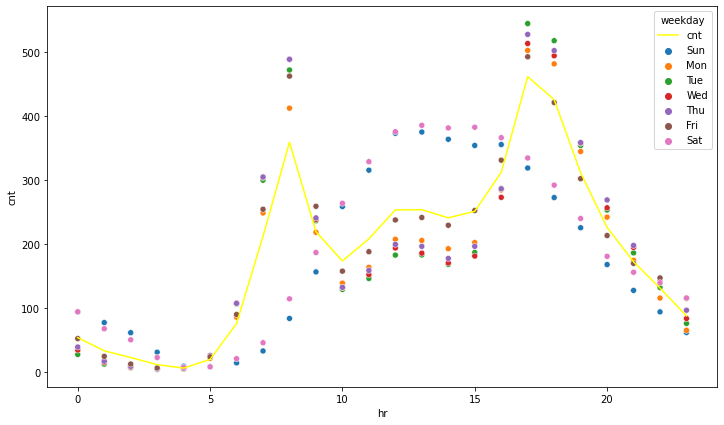

In [13]:
#plot the daytime for each weekday
hr_each_weekday = pd.DataFrame(rental_bike.groupby(['weekday','hr'])['cnt'].mean()).reset_index()
hr_each_weekday['weekday'].replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'},inplace=True)
hr_each_weekday
plt.figure (figsize= (12,7)) 
_ = mean_rental_bike_weekday.plot(color='yellow')
_ = sns.scatterplot(x='hr',y='cnt',hue='weekday',data=hr_each_weekday)

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

3/ Beside evaluating the frequency of rental bikes used over the days. The company need to pay more attention to the percentage of membership users (registered). The memebership bikers will help the company develope rental bike programs more widely as more people will have habit of using bike in daily life. As the number of bikers become variant in different month, I can conduct this hypothesis to determine the possible time of high demand in next years.

In [14]:
#calculate the percentage of new bikers and casual bikers
rental_bike['registeredpercent'] = round(rental_bike['registered'] / rental_bike['cnt'] *100,2)
rental_bike['casualpercent'] = round(rental_bike['casual'] / rental_bike['cnt'] *100,2)

C:\Users\nickh\New folder\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


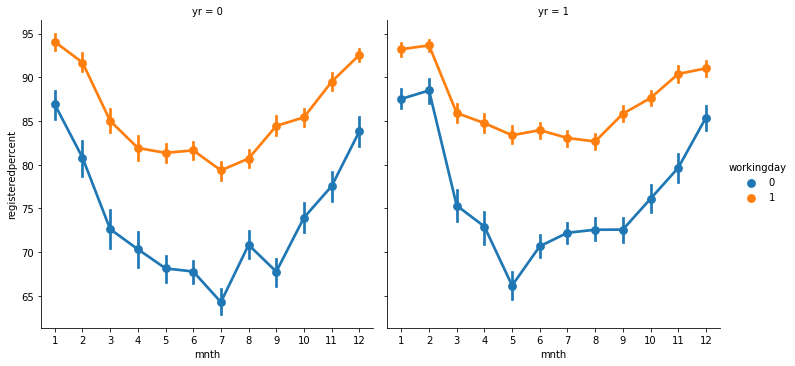

In [15]:
sns.factorplot(data = rental_bike, x ="mnth", y = "registeredpercent", col = 'yr',hue='workingday') # per store type in cols)

The number of membership bikers in working days is higher than off days as always, while the spring term witnesses the high demand of users. Additionally, the number of membership bikers seem to be constant throughout two years. The number of casual bikers is quite opposite to membership bikers, the large number of casual bikers happens during the Summer and Fall although the trend is not stable. Moreover, casual bikers will often use bike in their off days. 

C:\Users\nickh\New folder\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


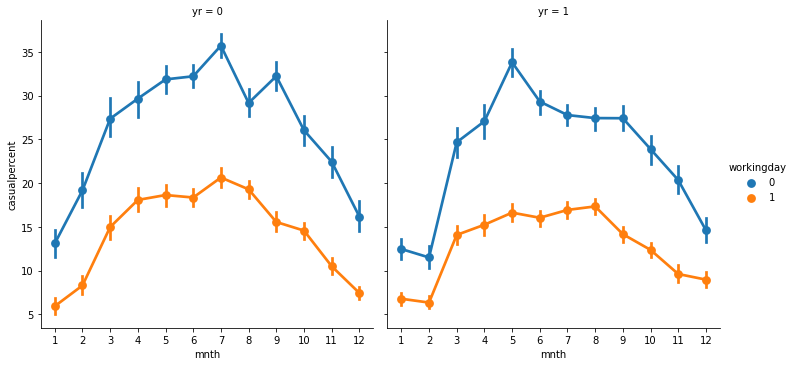

In [16]:
sns.factorplot(data = rental_bike, x ="mnth", y = "casualpercent", col = 'yr',hue='workingday') # per store type in cols)

Next, we will evaluate the type of time series for registered and casual to see if it is stationary or non-stationary. If there is stationary, you have more chance to predict the number of bikers accurately over the seasons based on the past record. Augmented Dickey-Fuller method is used to test this hypothesis, assuming: 

Null Hypothesis states there is the presence of a unit root

Alternate Hypothesis states there is no unit root. In other words, Stationarity exists.

In [17]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [18]:
adfTest = adfuller(rental_bike['registered'], autolag='AIC')

dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
#Add Critical Values
for key,value in adfTest[4].items():
    dfResults['Critical Value (%s)'%key] = value
print('Augmented Dickey-Fuller Test Results:')
print(dfResults)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -7.531837e+00
P-Value                 3.561649e-11
# Lags Used             4.400000e+01
# Observations Used     1.733400e+04
Critical Value (1%)    -3.430727e+00
Critical Value (5%)    -2.861707e+00
Critical Value (10%)   -2.566859e+00
dtype: float64


The results show that the series is actually non-stationary. In this case, the P-Value from our ADF test is much higher than our 5% significance level, therefore we can accept the Null hypothesis.

In [19]:
adfTest = adfuller(rental_bike['casual'], autolag='AIC')

dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
#Add Critical Values
for key,value in adfTest[4].items():
    dfResults['Critical Value (%s)'%key] = value
print('Augmented Dickey-Fuller Test Results:')
print(dfResults)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.366751e+01
P-Value                 1.481035e-25
# Lags Used             4.400000e+01
# Observations Used     1.733400e+04
Critical Value (1%)    -3.430727e+00
Critical Value (5%)    -2.861707e+00
Critical Value (10%)   -2.566859e+00
dtype: float64


The results show that the series is actually stationary. In this case, the P-Value from our ADF test is much smaller than our 5% significance level, therefore I can reject the Null hypothesis and instead accept the alternate hypothesis that stationarity exists. 

The charts below will help us to observe the changes in user number over the seasons in two years

C:\Users\nickh\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


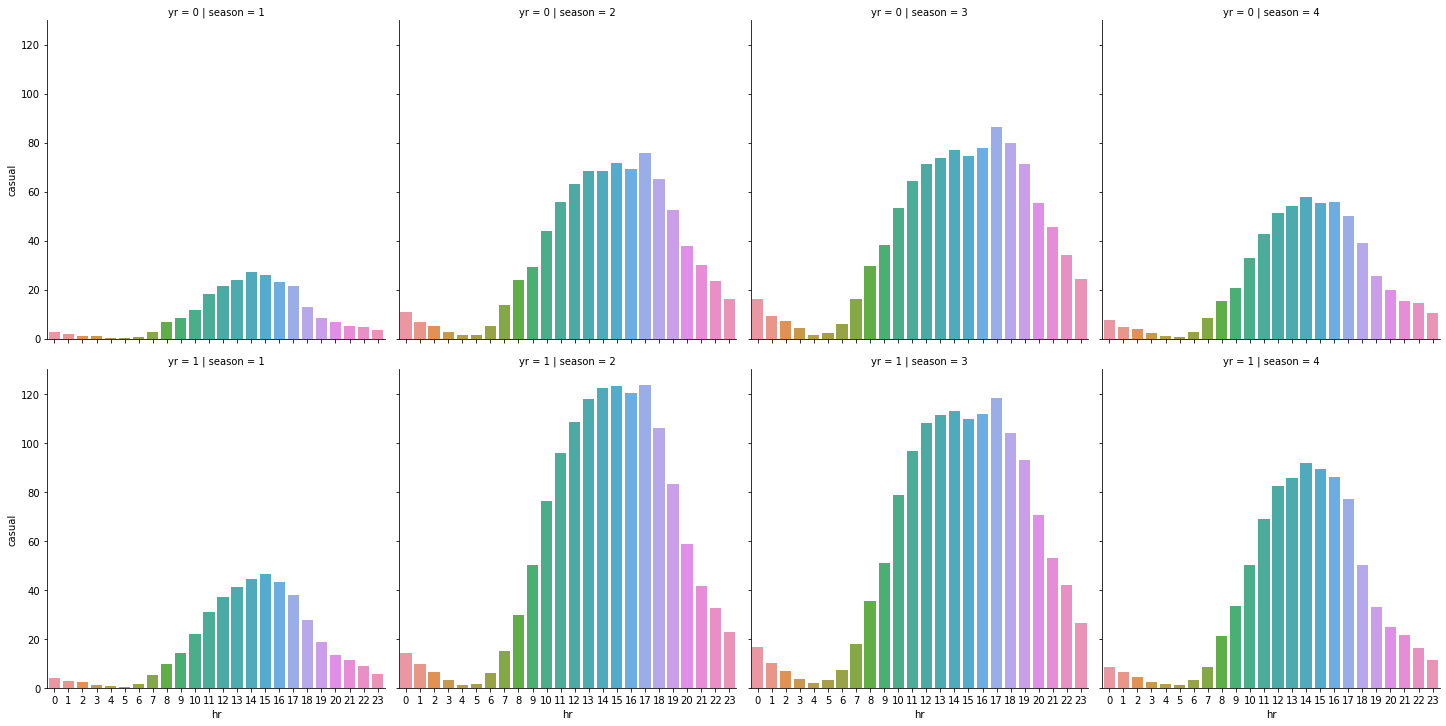

In [20]:
mean_casual = pd.DataFrame(rental_bike.groupby(['season','yr','hr'])['casual'].mean()).reset_index()
sns.catplot('hr','casual',col='season',row='yr',kind='bar',data=mean_casual)

C:\Users\nickh\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


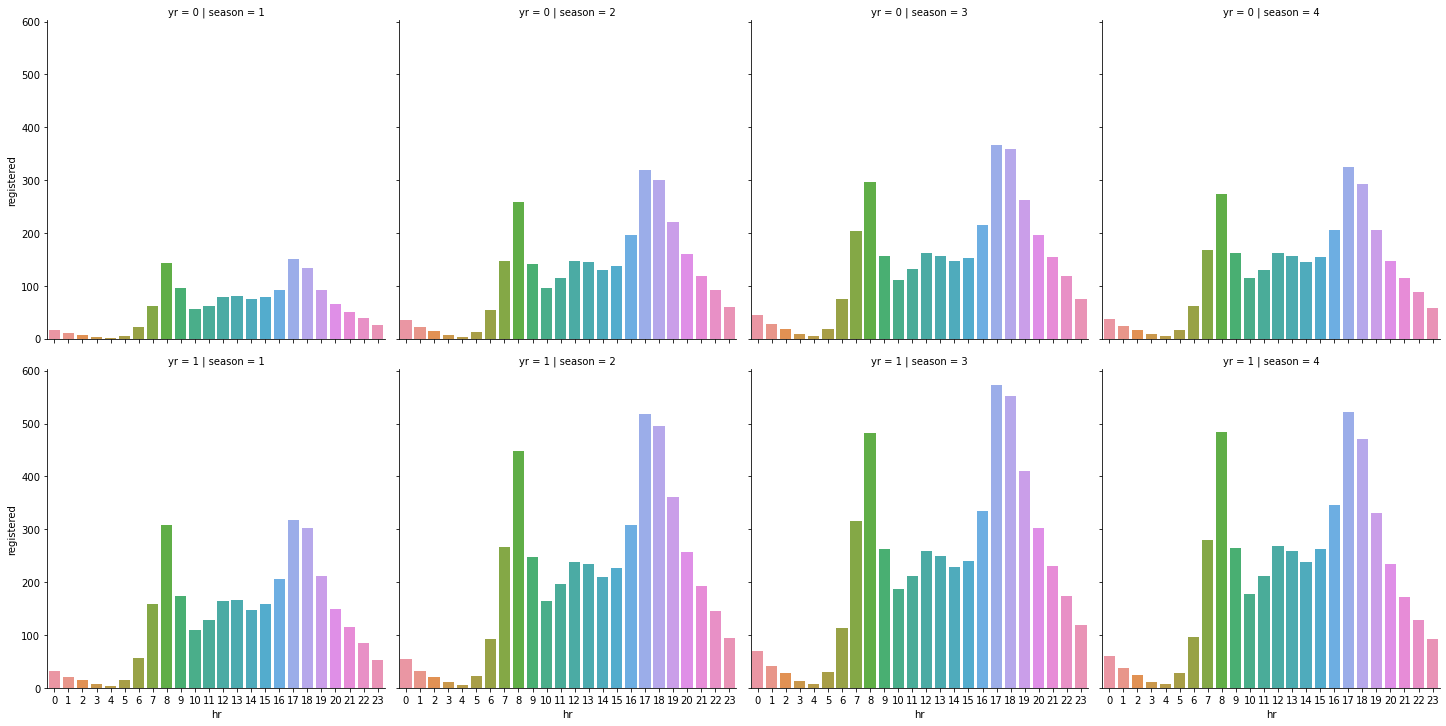

In [21]:
mean_registered = pd.DataFrame(rental_bike.groupby(['season','yr','hr'])['registered'].mean()).reset_index()
sns.catplot('hr','registered',col='season',row='yr',kind='bar',data=mean_registered)

In [22]:
#The increase rate of rental bike users in two years
pivot_register = pd.pivot_table(rental_bike[['season','yr','mnth','registered']],values='registered',index=['season'],columns='yr')
difference=[]
for i in range(0,len(pivot_register)):
    difference.append(round(pivot_register.iloc[i,1]) - round(pivot_register.iloc[i,0]))
pivot_register['difference'] = difference
percent=[]
for i in range(0,len(pivot_register)):
    percent.append(round(pivot_register.iloc[i,2])/ round(pivot_register.iloc[i,0]))
pivot_register['percent'] = percent

yr               0           1  difference   percent
season                                              
1        62.173598  129.784269          68  1.096774
2       122.447571  201.865367          80  0.655738
3       144.732143  226.435284          81  0.558621
4       128.080600  209.011916          81  0.632812


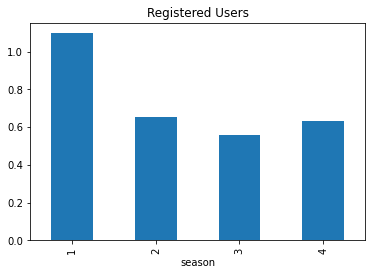

In [23]:
_ = pivot_register['percent'].plot(kind='bar')
_ = plt.title('Registered Users')
print(pivot_register)

In [24]:
pivot_register1 = pd.pivot_table(rental_bike[['season','yr','mnth','casual']],values='casual',index=['season'],columns='yr')
difference=[]
for i in range(0,len(pivot_register1)):
    difference.append(round(pivot_register1.iloc[i,1]) - round(pivot_register1.iloc[i,0]))
pivot_register1['difference'] = difference
percent=[]
for i in range(0,len(pivot_register1)):
    percent.append(round(pivot_register1.iloc[i,2])/ round(pivot_register1.iloc[i,0]))
pivot_register1['percent'] = percent   

yr              0          1  difference   percent
season                                            
1       10.360251  18.029899           8  0.800000
2       35.208352  57.097915          22  0.628571
3       42.611607  57.908245          15  0.348837
4       24.748360  36.686845          12  0.480000


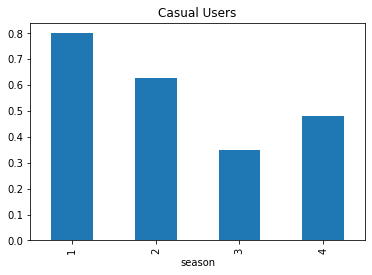

In [25]:
_ = pivot_register1['percent'].plot(kind='bar')
_ = plt.title('Casual Users')
print(pivot_register1)

In [26]:
#The difference of increase in number of registered and casual users for two years
round((pivot_register1['difference'].sum()  / pivot_register['difference'].sum()),2) *100

18.0

# iv. Summary

-----------------------------------------------Summary:------------------------------------------------------
    
    _ The number of rental bikes in daytime and nighttime has no difference.
    
    _ Users mostly prefer using bike in the working days.
    
    _ The number of registered users is higher than casual users in working day, the high density will often fall on Spring and Winter. The busiest hours of registered users in 2012 often happen around from 7-8 and 17-19 with 400-600 bikes on average, increasing by approximately 200 bikes. 
    
    _ The density of casual users will often fall on Summer and Fall. The busiest hours of casual users in 2012 often happen around from 12 to 18 with 100-120 bikes on average, increasing by approximately 20-30 since 2011. 
    
    _ The time series of using rental bikes according to registered users is not predictable, but according to casual users is predictable.
    
    _ The increase of registered users is significantly higher than casual users, it increases more than double number the previous year. Most insterestingly, the increase rate of both registered and casual users in Spring increases by 119% & 82%. 
    
    _ The increase of casual users is just 18% compared to registered users from 2011-2012.

# v. Solution

---------------------------------------------Solutions------------------------------------------------------

---> Rental bikes should be distributed widely in other areas to encourage more people to get acquainted with using bike as their daily transportation. Especially, the spots of rental bike are suggested to place nearby the industry, company or school areas to solve the traffic issues. 

---> Casual users are getting more in Spring and Winter, so it is possible that there are more people using rental bikes wihout membership, this case should be investigated more to gain the insight. 

---> The distribution of rental bikes should be adaptable to high demand of users in Spring. 

---> Moreover, the company is expected to provide around 60-80 bikes for each season in next year since the number of users may increase quickly.

---> There should be marketing campaigns to increase the rate of casual users every day.

---> The number of bikes at peak hours should be ensured at least around 400-600 bikes.

---> ARIMA model is suggested to predict the time series of casual users, and Prophet is suggested to predict for registered users.

# THANK YOU !!!!!!!!!!!!!!!!!!!!